# Kaggle: Titanic
https://www.kaggle.com/c/titanic <br/>
Data: 04/02/2019 (updated)<br/>
Autor: Diego Abreu | https://github.com/DiegoAbreu/

***

Importando Pandas e o dataset.

In [204]:
import pandas as pd
data = "train.csv"
data = pd.read_csv(data)
teste = "test.csv"
teste = pd.read_csv(teste)

In [167]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [168]:
teste.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


***

#### (T1) Retirando valores desnecessários:

In [169]:
data_t1 = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
teste_t1 = teste.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [170]:
data_t1.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C


In [171]:
teste_t1.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S


#### (T2) Transformando palavras em valores numéricos:

In [172]:
data_t1['Pclass'] = data_t1['Pclass'].astype('category')
teste_t1['Pclass'] = teste_t1['Pclass'].astype('category')

In [173]:
data_t2 = pd.get_dummies(data_t1)
teste_t2 = pd.get_dummies(teste_t1)

In [174]:
data_t2.head(2)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0


In [175]:
teste_t2.head(2)

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1


***

#### (T3) Substituir valores NA

In [176]:
data_t2.isnull().sum().sort_values(ascending=False).head(12)

Age           177
Embarked_S      0
Embarked_Q      0
Embarked_C      0
Sex_male        0
Sex_female      0
Pclass_3        0
Pclass_2        0
Pclass_1        0
Fare            0
Parch           0
SibSp           0
dtype: int64

Substituindo a idade faltantes pela idade média:

In [177]:
data_t3 = data_t2
data_t3['Age'].fillna(data_t3['Age'].mean(), inplace=True)
data_t3.head(2)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0


In [178]:
teste_t2.isnull().sum().sort_values(ascending=False).head(12)

Age           86
Fare           1
Embarked_S     0
Embarked_Q     0
Embarked_C     0
Sex_male       0
Sex_female     0
Pclass_3       0
Pclass_2       0
Pclass_1       0
Parch          0
SibSp          0
dtype: int64

Substituindo a idade e valor de passagem faltantes pelas médias:

In [179]:
teste_t3 = teste_t2
teste_t3['Age'].fillna(teste_t3['Age'].mean(), inplace=True)
teste_t3['Fare'].fillna(teste_t3['Fare'].mean(), inplace=True)
teste_t3.head(2)

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1


Dummies com a idade

In [180]:
data_t3['faixa_etaria'] = None
teste_t3['faixa_etaria'] = None

In [181]:
data_t3['Age'] = data_t3['Age'].astype(int)
teste_t3['Age'] = teste_t3['Age'].astype(int)

In [182]:
data_t3.loc[(0 <= data_t3.Age) & (data_t3.Age < 13), 'faixa_etaria'] = 'criança'
data_t3.loc[(13 <= data_t3.Age) & (data_t3.Age < 21), 'faixa_etaria'] = 'jovem'
data_t3.loc[(21 <= data_t3.Age) & (data_t3.Age < 60), 'faixa_etaria'] = 'adulto'
data_t3.loc[(60 <= data_t3.Age), 'faixa_etaria'] = 'idoso'

In [183]:
teste_t3.loc[(0 <= teste_t3.Age) & (teste_t3.Age < 13), 'faixa_etaria'] = 'criança'
teste_t3.loc[(13 <= teste_t3.Age) & (teste_t3.Age < 21), 'faixa_etaria'] = 'jovem'
teste_t3.loc[(21 <= teste_t3.Age) & (teste_t3.Age < 60), 'faixa_etaria'] = 'adulto'
teste_t3.loc[(60 <= teste_t3.Age), 'faixa_etaria'] = 'idoso'

In [184]:
data_t3 = data_t3.drop('Age', axis=1)
teste_t3 = teste_t3.drop('Age', axis=1)
data_t3 = pd.get_dummies(data_t3)
teste_t3 = pd.get_dummies(teste_t3)

***

Precisamos descobrir de acordo com suas caracteristicas, se as pessoas do dataset "teste" sobreviveram ou não.<br/> Para isso, vamos verificar no dataset "data" se quais caracteristicas influenciam nesse resultado.

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [186]:
train = data_t3

In [187]:
len(data_t3.columns)

17

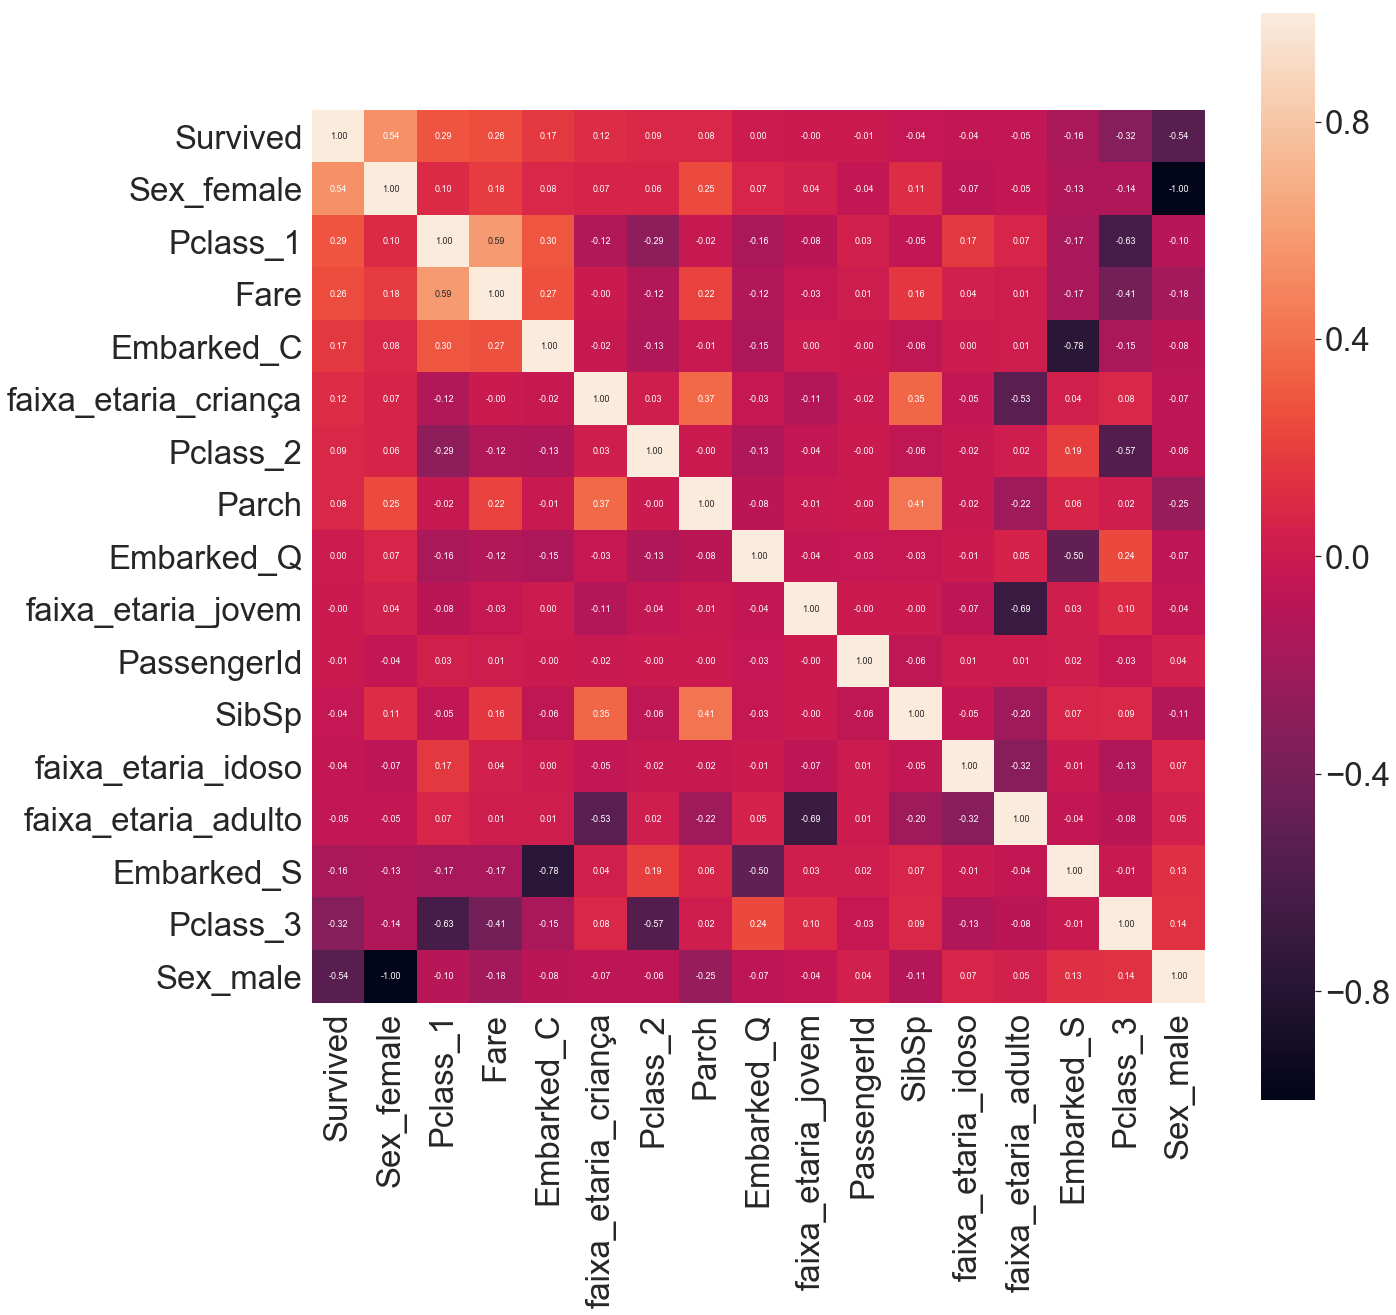

In [189]:
k = 18
f, ax = plt.subplots(figsize=(20, 20))
corrmat = train.corr()
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 3)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

***

In [210]:
analise = pd.DataFrame(data_t3.groupby(['Survived']).sum())
analise

,PassengerId,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,faixa_etaria_adulto,faixa_etaria_criança,faixa_etaria_idoso,faixa_etaria_jovem
Survived,,,,,,,,,,,,,,,,
0,245412,304,181,12142.7199,80.0,97.0,372.0,81.0,468.0,75.0,47.0,427.0,432.0,29.0,19.0,69.0
1,151974,162,159,16551.2294,136.0,87.0,119.0,233.0,109.0,93.0,30.0,217.0,253.0,40.0,7.0,42.0


***

## Modelo Preditivo

### Decision Tree:

In [190]:
from sklearn.tree import DecisionTreeClassifier

In [191]:
#separando variaveis
X = data_t3.drop('Survived', axis=1)
Y = data_t3['Survived']

In [192]:
#modelo em si
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [193]:
tree.score(X,Y)

0.8316498316498316

In [121]:
#aplicando o modelo no dataset teste
resposta_tree = pd.DataFrame()
resposta_tree['PassengerId'] = teste_t3['PassengerId']
resposta_tree['Survived'] = tree.predict(teste_t3)

In [122]:
resposta_tree.to_csv('resposta_tree.csv', index=False)

In [101]:
# melhor resultado no Kaggle: 0.79904